In [231]:
import yfinance as yf
import pandas as pd
import os

In [232]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [233]:
sp500.index = pd.to_datetime(sp500.index)


C:\Users\guera\AppData\Local\Temp\ipykernel_19320\2003460346.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sp500.index = pd.to_datetime(sp500.index)


In [234]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
# sp500

# print(sp500.head())  # Affiche les premières lignes du DataFrame pour voir la structure
# print(sp500.columns)  # Affiche les noms des colonnes du DataFrame
# print(sp500.index)

<Axes: xlabel='Date'>

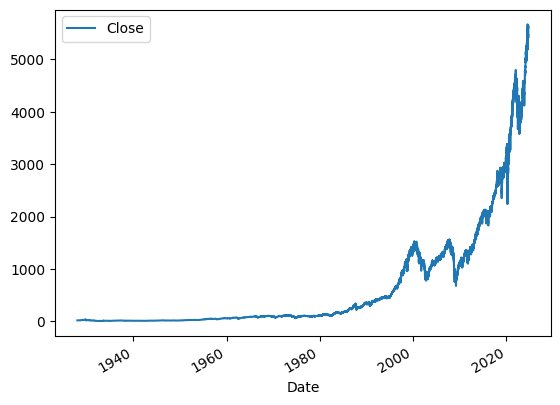

In [235]:
sp500.plot.line(y="Close", use_index=True)

In [236]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [237]:
# print(sp500)
sp500["Tomorrow"] = sp500["Close"].shift(-1)
# print(sp500)


In [238]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824,0
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156,0
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922,0


In [239]:
print(sp500.index)
date_start = pd.Timestamp('2010-03-29 00:00:00-04:00')

if date_start in sp500.index:
    sp500_filtered = sp500.loc[date_start:].copy()
else:
    print("La date f'{date_start} n'existe pas dans l'index.")


Index([1927-12-30 00:00:00-05:00, 1928-01-03 00:00:00-05:00,
       1928-01-04 00:00:00-05:00, 1928-01-05 00:00:00-05:00,
       1928-01-06 00:00:00-05:00, 1928-01-09 00:00:00-05:00,
       1928-01-10 00:00:00-05:00, 1928-01-11 00:00:00-05:00,
       1928-01-12 00:00:00-05:00, 1928-01-13 00:00:00-05:00,
       ...
       2024-08-26 00:00:00-04:00, 2024-08-27 00:00:00-04:00,
       2024-08-28 00:00:00-04:00, 2024-08-29 00:00:00-04:00,
       2024-08-30 00:00:00-04:00, 2024-09-03 00:00:00-04:00,
       2024-09-04 00:00:00-04:00, 2024-09-05 00:00:00-04:00,
       2024-09-06 00:00:00-04:00, 2024-09-09 00:00:00-04:00],
      dtype='object', name='Date', length=24288)


In [240]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [241]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.625

                           Target  0
Date                                
2024-04-17 00:00:00-04:00       0  0
2024-04-18 00:00:00-04:00       0  0
2024-04-19 00:00:00-04:00       1  1
2024-04-22 00:00:00-04:00       1  1
2024-04-23 00:00:00-04:00       1  0
...                           ... ..
2024-09-03 00:00:00-04:00       0  0
2024-09-04 00:00:00-04:00       0  0
2024-09-05 00:00:00-04:00       0  0
2024-09-06 00:00:00-04:00       1  0
2024-09-09 00:00:00-04:00       0  0

[100 rows x 2 columns]


<Axes: xlabel='Date'>

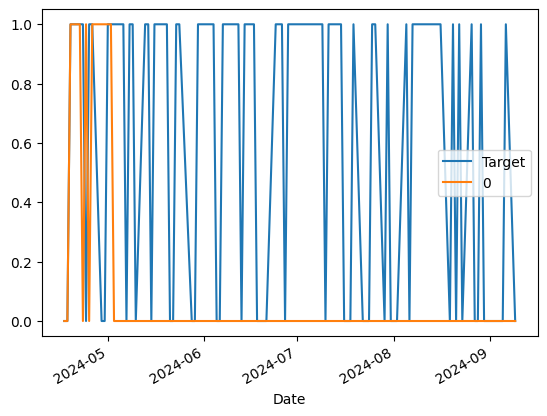

In [242]:
combined = pd.concat([test["Target"], preds], axis=1)
print(combined)
combined.plot()

In [243]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [244]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [245]:
predictions = backtest(sp500, model, predictors)

KeyboardInterrupt: 

In [16]:
predictions["Predictions"].value_counts()

Predictions
0    3642
1    2596
Name: count, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [18]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535268
0    0.464732
Name: count, dtype: float64

In [19]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [20]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824,0,0.989311,1.0,0.987758,2.0,1.006811,36.0,1.111632,144.0,1.275821,527.0
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156,0,0.999198,0.0,0.989915,1.0,1.004670,36.0,1.108910,144.0,1.273136,526.0
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922,0,0.998489,0.0,0.990079,1.0,1.001204,35.0,1.104629,144.0,1.268674,525.0


In [22]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
predictions = backtest(sp500, model, new_predictors)

In [25]:
predictions["Predictions"].value_counts()

Predictions
0.0    4395
1.0     843
Name: count, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5729537366548043

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.544864
0    0.455136
Name: count, dtype: float64

In [28]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-09-03 00:00:00-04:00,0,0.0
2024-09-04 00:00:00-04:00,0,0.0
2024-09-05 00:00:00-04:00,0,0.0
